In [69]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import csv
from sklearn.utils import shuffle
from sklearn import metrics


In [7]:
# citire imagini de antrenare plus etichete de antrenare
f = open ("train.txt") # deschidere fisier
train_images = []
train_labels = []
for line in enumerate(open("train.txt", "r")):
    v = line[1].split(',') # citire linie din fisier
    image_name = 'train/'+v[0] # formare cale catre folderul cu imagini
    label = int(v[1]) # transformare numar clasa din string in int
    train_labels.append(label) # adaugare clasa 
    image = plt.imread(image_name) # citire imagine matrice 32 X 32
    train_images.append(image) # adaugare imagine
# transformare in numpy arrays
train_images = np.expand_dims(train_images, axis=3) #redimensionare (30001, 32, 32) => (30001, 32, 32, 1)
train_labels = np.array(train_labels) 

train_images, train_labels = shuffle(train_images, train_labels) # amestecare

In [8]:
# citire imagini de testare 
f = open ("test.txt")
test_images = []
name_test_images =[]
for line in enumerate(open("test.txt", "r")):
    image_name = 'test/'+ line[1][:len(line[1])-1] # formare cale director cu imagini 
                                                    #(+ sterg caracterul '\n' de la final, altfel => erooare)
    name_test_images.append(line[1][:len(line[1])-1])
    image = plt.imread(image_name)
    test_images.append(image)
    
test_images = np.expand_dims(test_images, axis=3)

In [24]:
# citire imagini de validare plus etichete de validare
f = open ("validation.txt")
validation_images = []
validation_labels = []
for line in enumerate(open("validation.txt", "r")):
    v = line[1].split(',')
    image_name = 'validation/'+v[0]
    label = int(v[1])
    validation_labels.append(label)
    image = plt.imread(image_name)
    validation_images.append(image)

validation_images = np.expand_dims(validation_images, axis=3)
validation_labels = np.array(validation_labels)

validation_images, validation_labels = shuffle(validation_images, validation_labels)

In [26]:
classes = 9 # 9 categorii notate de la 0 la 8

y_val=np_utils.to_categorical(validation_labels, classes) 
y_train=np_utils.to_categorical(train_labels, classes) 


In [16]:
# API de tip secvential 
model = keras.Sequential()
# ------------------------------Feature extraction part----------------------
# 32 filtre din care va invata
# marime kernel (3,3) => matrice 3 x 3
# 'relu' functia de activare care va fi aplicata dupa convolutie
# input_shape ii spun modelului ce tip de date am 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
# in functia de max pooling -> matrice de 2 x 2 
model.add(layers.MaxPooling2D((2, 2)))
# 64 filtre din care va invata
# marime kernel (3,3) => matrice 3 x 3
# 'relu' functia de activare care va fi aplicata dupa convolutie
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# in functia de max pooling -> matrice de 2 x 2 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
#---------------------------------Clasification part--------------------------------------
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(classes, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)              

In [29]:
# configurare model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# antrenare model
history = model.fit(train_images, y_train, batch_size=64, epochs=25, verbose=1, validation_data=(validation_images, y_val))
# evaluare model
loss_accuracy = model.evaluate(validation_images, y_val)
print(loss_accuracy)

Epoch 1/10
469/469 [==============================] - 25s 50ms/step - loss: 0.0407 - accuracy: 0.9866 - val_loss: 0.8348 - val_accuracy: 0.8578
Epoch 2/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.7684 - val_accuracy: 0.8578
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.8204 - val_accuracy: 0.8510
Epoch 4/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.8685 - val_accuracy: 0.8488
Epoch 5/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.7848 - val_accuracy: 0.8476
Epoch 6/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.8730 - val_accuracy: 0.8470
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.8894 - val_accuracy:

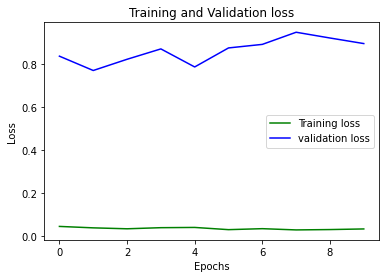

In [35]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

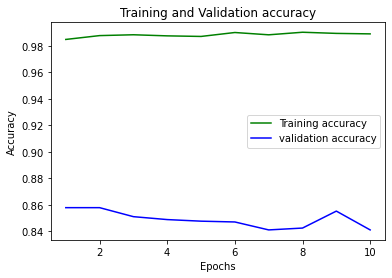

In [33]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
y_pred=model.predict_classes(validation_images).astype("int32")
confusion_matrix=metrics.confusion_matrix(validation_labels, y_pred, labels=[0,1,2,3,4,5,6,7,8])
print(confusion_matrix)

[[483   2   5   4  23   4  12  17  20]
 [ 25 433  10  13   7   3   9  23   4]
 [ 10   9 447   9  19  20   7  10   2]
 [ 14   1  10 470  21  12  14  15  21]
 [ 45   5  15  17 430  10   7  18   7]
 [  4   2  18  12  15 467  14  23   6]
 [ 24   1   3   4   4   4 528   1  11]
 [ 22   9  11  12   7  13   8 432   6]
 [ 26   2   0   7   2   3  19   3 515]]


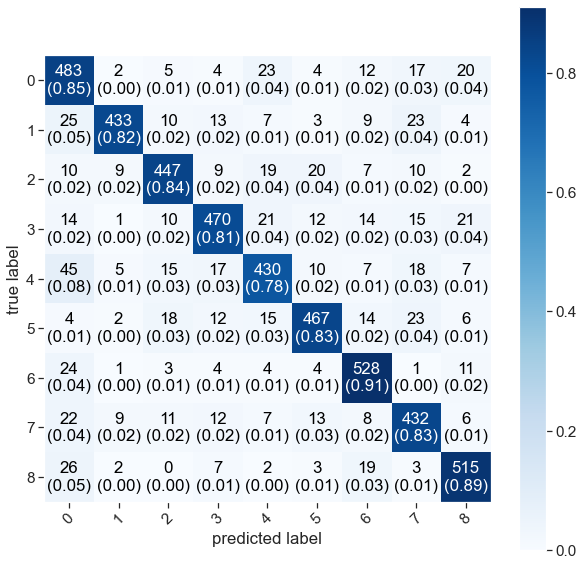

In [68]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix, colorbar=True, 
                      class_names=[0,1,2,3,4,5,6,7,8], 
                      figsize=(10, 10),
                      show_absolute=True,
                        show_normed=True)
plt.show()

In [56]:
# prezicere
predict =model.predict_classes(test_images).astype("int32")

# scriere in fisier 
f = open("submission_9.csv", "w", newline="")
csv_file= csv.writer(f, delimiter=",")
csv_file.writerow(['id', 'label'])
for i in range (predict.shape[0]):
    #print(name_test_images[i], ",", predict[i], sep="")
    csv_file.writerow([name_test_images[i], predict[i]])
f.close()

035001.png,5
035002.png,0
035003.png,1
035004.png,5
035005.png,7
035006.png,0
035007.png,3
035008.png,7
035009.png,7
035010.png,7
035011.png,1
035012.png,5
035013.png,5
035014.png,1
035015.png,4
035016.png,1
035017.png,1
035018.png,4
035019.png,4
035020.png,6
035021.png,8
035022.png,0
035023.png,5
035024.png,8
035025.png,4
035026.png,7
035027.png,3
035028.png,5
035029.png,8
035030.png,3
035031.png,5
035032.png,0
035033.png,1
035034.png,1
035035.png,3
035036.png,7
035037.png,2
035038.png,1
035039.png,5
035040.png,0
035041.png,3
035042.png,6
035043.png,0
035044.png,0
035045.png,3
035046.png,7
035047.png,5
035048.png,3
035049.png,0
035050.png,1
035051.png,0
035052.png,3
035053.png,7
035054.png,1
035055.png,1
035056.png,7
035057.png,7
035058.png,7
035059.png,4
035060.png,4
035061.png,6
035062.png,4
035063.png,6
035064.png,4
035065.png,3
035066.png,3
035067.png,4
035068.png,2
035069.png,5
035070.png,1
035071.png,3
035072.png,1
035073.png,7
035074.png,6
035075.png,6
035076.png,3
035077.png,0

035664.png,4
035665.png,7
035666.png,3
035667.png,0
035668.png,1
035669.png,2
035670.png,6
035671.png,4
035672.png,8
035673.png,8
035674.png,4
035675.png,6
035676.png,4
035677.png,2
035678.png,2
035679.png,8
035680.png,7
035681.png,5
035682.png,4
035683.png,1
035684.png,1
035685.png,7
035686.png,2
035687.png,8
035688.png,4
035689.png,1
035690.png,2
035691.png,2
035692.png,2
035693.png,1
035694.png,5
035695.png,4
035696.png,7
035697.png,5
035698.png,6
035699.png,4
035700.png,1
035701.png,7
035702.png,3
035703.png,2
035704.png,4
035705.png,5
035706.png,4
035707.png,7
035708.png,6
035709.png,5
035710.png,2
035711.png,1
035712.png,3
035713.png,8
035714.png,6
035715.png,5
035716.png,0
035717.png,5
035718.png,4
035719.png,2
035720.png,1
035721.png,0
035722.png,7
035723.png,1
035724.png,7
035725.png,8
035726.png,6
035727.png,1
035728.png,6
035729.png,1
035730.png,2
035731.png,8
035732.png,0
035733.png,4
035734.png,2
035735.png,3
035736.png,6
035737.png,8
035738.png,3
035739.png,4
035740.png,1

036953.png,3
036954.png,6
036955.png,3
036956.png,5
036957.png,8
036958.png,6
036959.png,1
036960.png,3
036961.png,2
036962.png,3
036963.png,1
036964.png,0
036965.png,6
036966.png,0
036967.png,3
036968.png,5
036969.png,0
036970.png,8
036971.png,1
036972.png,3
036973.png,1
036974.png,3
036975.png,3
036976.png,2
036977.png,6
036978.png,2
036979.png,0
036980.png,2
036981.png,6
036982.png,7
036983.png,1
036984.png,7
036985.png,7
036986.png,8
036987.png,7
036988.png,8
036989.png,6
036990.png,5
036991.png,3
036992.png,4
036993.png,6
036994.png,1
036995.png,2
036996.png,7
036997.png,0
036998.png,4
036999.png,8
037000.png,7
037001.png,7
037002.png,7
037003.png,7
037004.png,8
037005.png,1
037006.png,5
037007.png,7
037008.png,5
037009.png,1
037010.png,8
037011.png,1
037012.png,0
037013.png,4
037014.png,0
037015.png,0
037016.png,4
037017.png,4
037018.png,1
037019.png,0
037020.png,0
037021.png,2
037022.png,0
037023.png,4
037024.png,5
037025.png,2
037026.png,0
037027.png,6
037028.png,4
037029.png,7

037677.png,5
037678.png,8
037679.png,4
037680.png,3
037681.png,4
037682.png,8
037683.png,5
037684.png,3
037685.png,1
037686.png,4
037687.png,5
037688.png,3
037689.png,0
037690.png,3
037691.png,8
037692.png,6
037693.png,8
037694.png,2
037695.png,3
037696.png,7
037697.png,7
037698.png,0
037699.png,3
037700.png,7
037701.png,8
037702.png,3
037703.png,6
037704.png,5
037705.png,3
037706.png,6
037707.png,2
037708.png,0
037709.png,3
037710.png,4
037711.png,7
037712.png,4
037713.png,7
037714.png,2
037715.png,6
037716.png,8
037717.png,8
037718.png,5
037719.png,4
037720.png,0
037721.png,2
037722.png,1
037723.png,5
037724.png,4
037725.png,3
037726.png,3
037727.png,7
037728.png,0
037729.png,4
037730.png,1
037731.png,0
037732.png,1
037733.png,0
037734.png,1
037735.png,6
037736.png,8
037737.png,6
037738.png,4
037739.png,4
037740.png,0
037741.png,8
037742.png,2
037743.png,5
037744.png,5
037745.png,4
037746.png,0
037747.png,2
037748.png,8
037749.png,1
037750.png,4
037751.png,2
037752.png,8
037753.png,3

038911.png,8
038912.png,1
038913.png,0
038914.png,2
038915.png,1
038916.png,6
038917.png,8
038918.png,6
038919.png,3
038920.png,8
038921.png,4
038922.png,5
038923.png,7
038924.png,2
038925.png,7
038926.png,7
038927.png,7
038928.png,0
038929.png,8
038930.png,1
038931.png,7
038932.png,5
038933.png,6
038934.png,5
038935.png,5
038936.png,8
038937.png,4
038938.png,3
038939.png,1
038940.png,1
038941.png,0
038942.png,8
038943.png,8
038944.png,0
038945.png,2
038946.png,0
038947.png,2
038948.png,0
038949.png,5
038950.png,2
038951.png,3
038952.png,8
038953.png,5
038954.png,8
038955.png,4
038956.png,6
038957.png,1
038958.png,8
038959.png,1
038960.png,8
038961.png,1
038962.png,8
038963.png,3
038964.png,0
038965.png,8
038966.png,4
038967.png,2
038968.png,3
038969.png,1
038970.png,3
038971.png,7
038972.png,1
038973.png,8
038974.png,1
038975.png,5
038976.png,6
038977.png,8
038978.png,7
038979.png,3
038980.png,8
038981.png,5
038982.png,5
038983.png,3
038984.png,4
038985.png,6
038986.png,5
038987.png,2

039572.png,1
039573.png,3
039574.png,4
039575.png,0
039576.png,3
039577.png,3
039578.png,8
039579.png,7
039580.png,5
039581.png,2
039582.png,3
039583.png,1
039584.png,2
039585.png,8
039586.png,5
039587.png,1
039588.png,7
039589.png,5
039590.png,8
039591.png,0
039592.png,2
039593.png,8
039594.png,5
039595.png,1
039596.png,2
039597.png,3
039598.png,6
039599.png,6
039600.png,3
039601.png,8
039602.png,6
039603.png,0
039604.png,0
039605.png,7
039606.png,0
039607.png,1
039608.png,0
039609.png,3
039610.png,1
039611.png,0
039612.png,7
039613.png,0
039614.png,2
039615.png,3
039616.png,8
039617.png,7
039618.png,0
039619.png,4
039620.png,4
039621.png,4
039622.png,6
039623.png,3
039624.png,2
039625.png,4
039626.png,6
039627.png,6
039628.png,6
039629.png,1
039630.png,8
039631.png,6
039632.png,8
039633.png,8
039634.png,5
039635.png,8
039636.png,8
039637.png,0
039638.png,2
039639.png,1
039640.png,4
039641.png,8
039642.png,3
039643.png,3
039644.png,1
039645.png,0
039646.png,6
039647.png,1
039648.png,2